In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.ticker as mticker
import seaborn as sns 
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import statsmodels.api as sm
import re
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)
csv_file_path = 'data/steam_reviews.csv'


In [67]:
#of course the path to the file is the one on my computer since it was not on the repo
df = pd.read_csv(csv_file_path, usecols = ['app_name','review','review_id','recommended', 'steam_purchase', 'received_for_free' ])

# RQ2
---

## Cleaning the data

We firstly need to check for any missing entries in the data.

In [68]:
df.isna().sum()

app_name                 0
review_id                0
review               33748
recommended              0
steam_purchase           0
received_for_free        0
dtype: int64

>There are as we can see 33748 reviews "missing", or more preciselly reviews with no text inside. These can still be considered in the review count for each application because the users still gave a positive or negative recommendation:

In [69]:
# just a look to show the point
df[['review', 'review_id', 'recommended']].loc[(df['review'].isna()) & (df['recommended'] == True) ]

review  review_id  recommended
32          NaN   85176661         True
116         NaN   85157446         True
234         NaN   85137051         True
653         NaN   85054410         True
700         NaN   85046235         True
...         ...        ...          ...
21742475    NaN   65683010         True
21743370    NaN   65674271         True
21744390    NaN   65665688         True
21745382    NaN   65659679         True
21746746    NaN   65651280         True

[32813 rows x 3 columns]

>Since there are no value missing we can count the number of occurencies for each app_name value to get the list of the top and lowest five apps for number of reviews received.



---
## 2.1 
### Identify which applications have the highest and lowest number of reviews.
---

In [70]:
df['app_name'].value_counts()

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS      1644255
Grand Theft Auto V                 1019116
Tom Clancy's Rainbow Six Siege      841918
Terraria                            672815
Garry's Mod                         655524
                                    ...   
Don't Escape: 4 Days to Survive       1013
Out of the Park Baseball 19            700
Shadow Complex Remastered              700
DRAGON QUEST HEROES™ II                600
Neon Hardcorps                         200
Name: count, Length: 315, dtype: int64

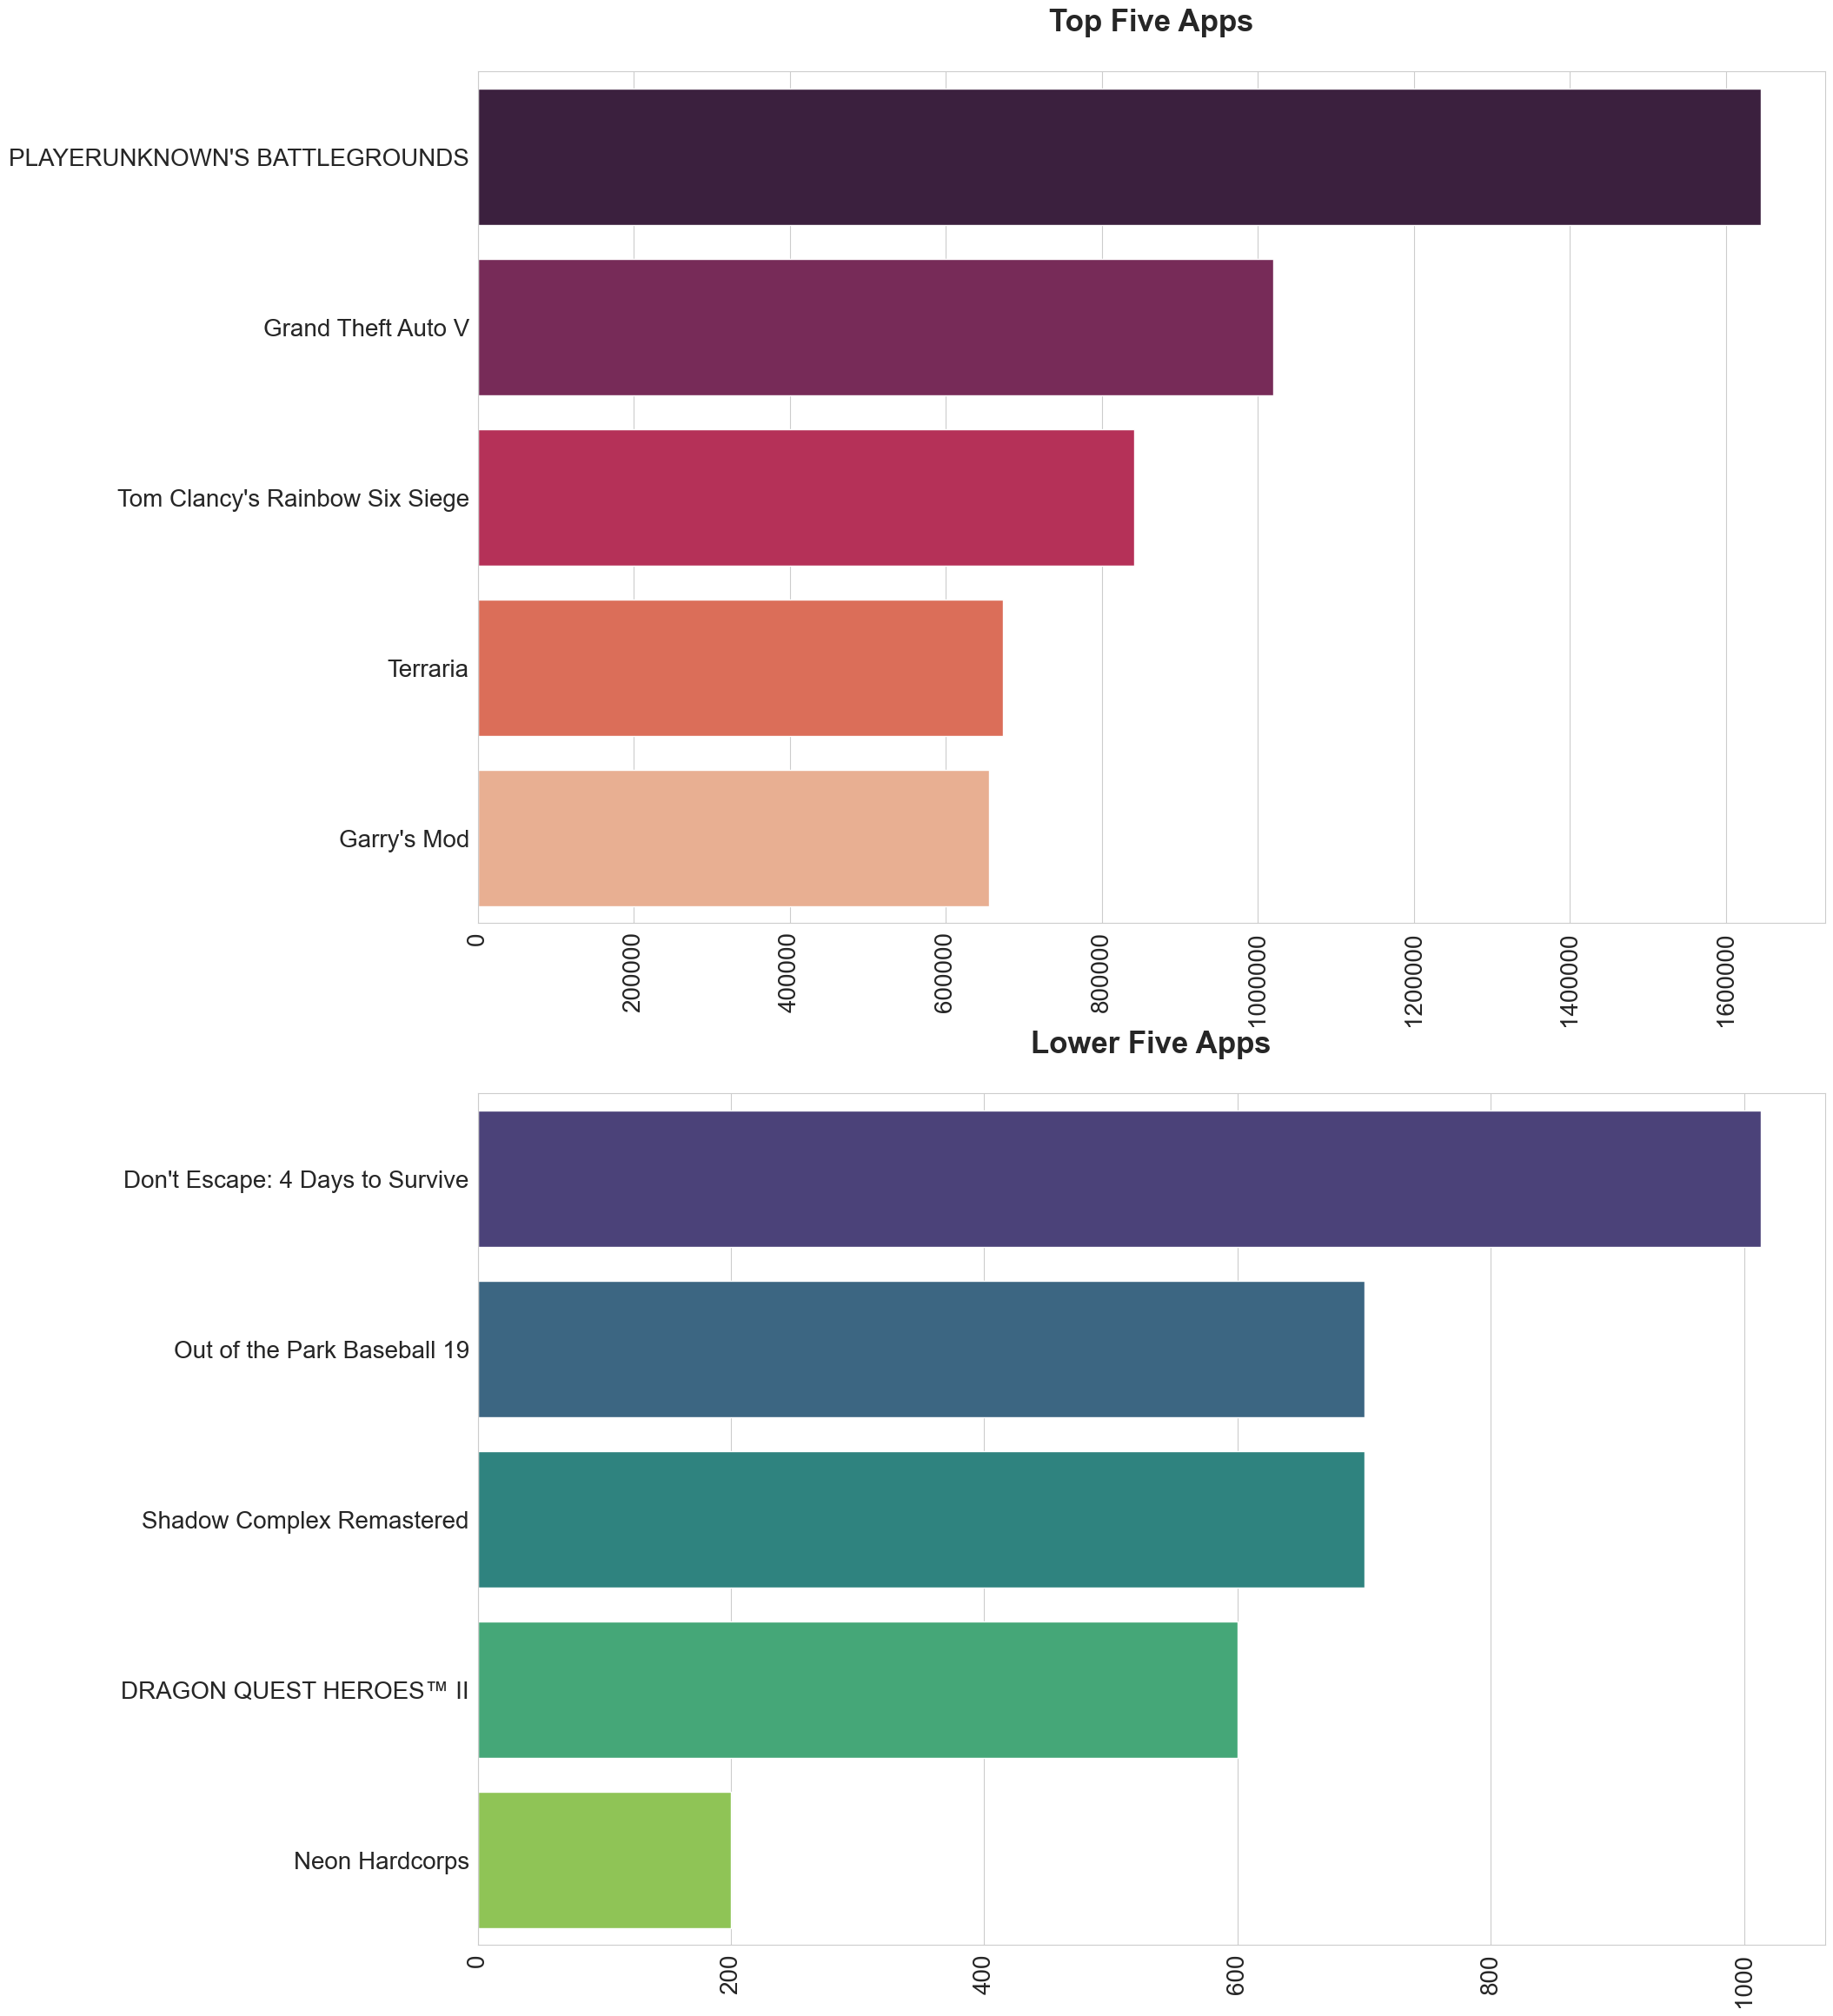

In [71]:
# get the first and last five app, and their number of reviews
top_5 = df['app_name'].value_counts()[:5]
lower_5 = df['app_name'].value_counts()[-5:]

#plot them in an orizontal barplot with different color to better highlight the differences in absolute value
sns.set_style("whitegrid") 

#this code is used to create a figure of two plots one over the other
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 28))

#we then plot by using the .values and .index of the two variables created before
sns.barplot(x = top_5.values, y = top_5.index, ax=  ax[0], hue= top_5.index, palette = 'rocket', orient='h')
ax[0].set_title('Top Five Apps\n', fontsize = 25, fontweight='bold')
ax[0].tick_params(axis='x', rotation =90, labelsize = 20)
ax[0].tick_params(axis='y',  labelsize = 20)
ax[0].set_ylabel(None)
ax[0].get_xaxis().get_major_formatter().set_scientific(False)


sns.barplot(x = lower_5.values, y = lower_5.index, hue= lower_5.index,ax = ax[1], palette = 'viridis', orient='h')
ax[1].set_title('Lower Five Apps\n', fontsize = 25,fontweight='bold')
ax[1].tick_params(axis= 'x', rotation= 90, labelsize = 20)
ax[1].tick_params(axis='y',  labelsize = 20)
ax[1].set_ylabel(None)

plt.show()


---
## 2.2 
### Plot the number of reviews for each application in descending order. What insights can you draw from the plot?
---

In [72]:
# Function to remove non-ASCII characters
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Apply the function to all the entries in the column, since there are many symbols that created problemns in later plots
df['app_name'] = df['app_name'].apply(remove_non_ascii)

df['app_name'].describe()

count                          21747371
unique                              315
top       PLAYERUNKNOWN'S BATTLEGROUNDS
freq                            1644255
Name: app_name, dtype: object

>As we can see there are more than 300 applications in this dataset, so the plot would be very difficult to read with the name tags on the axis, but we could still get an idea of the shape of the curve by omitting them.

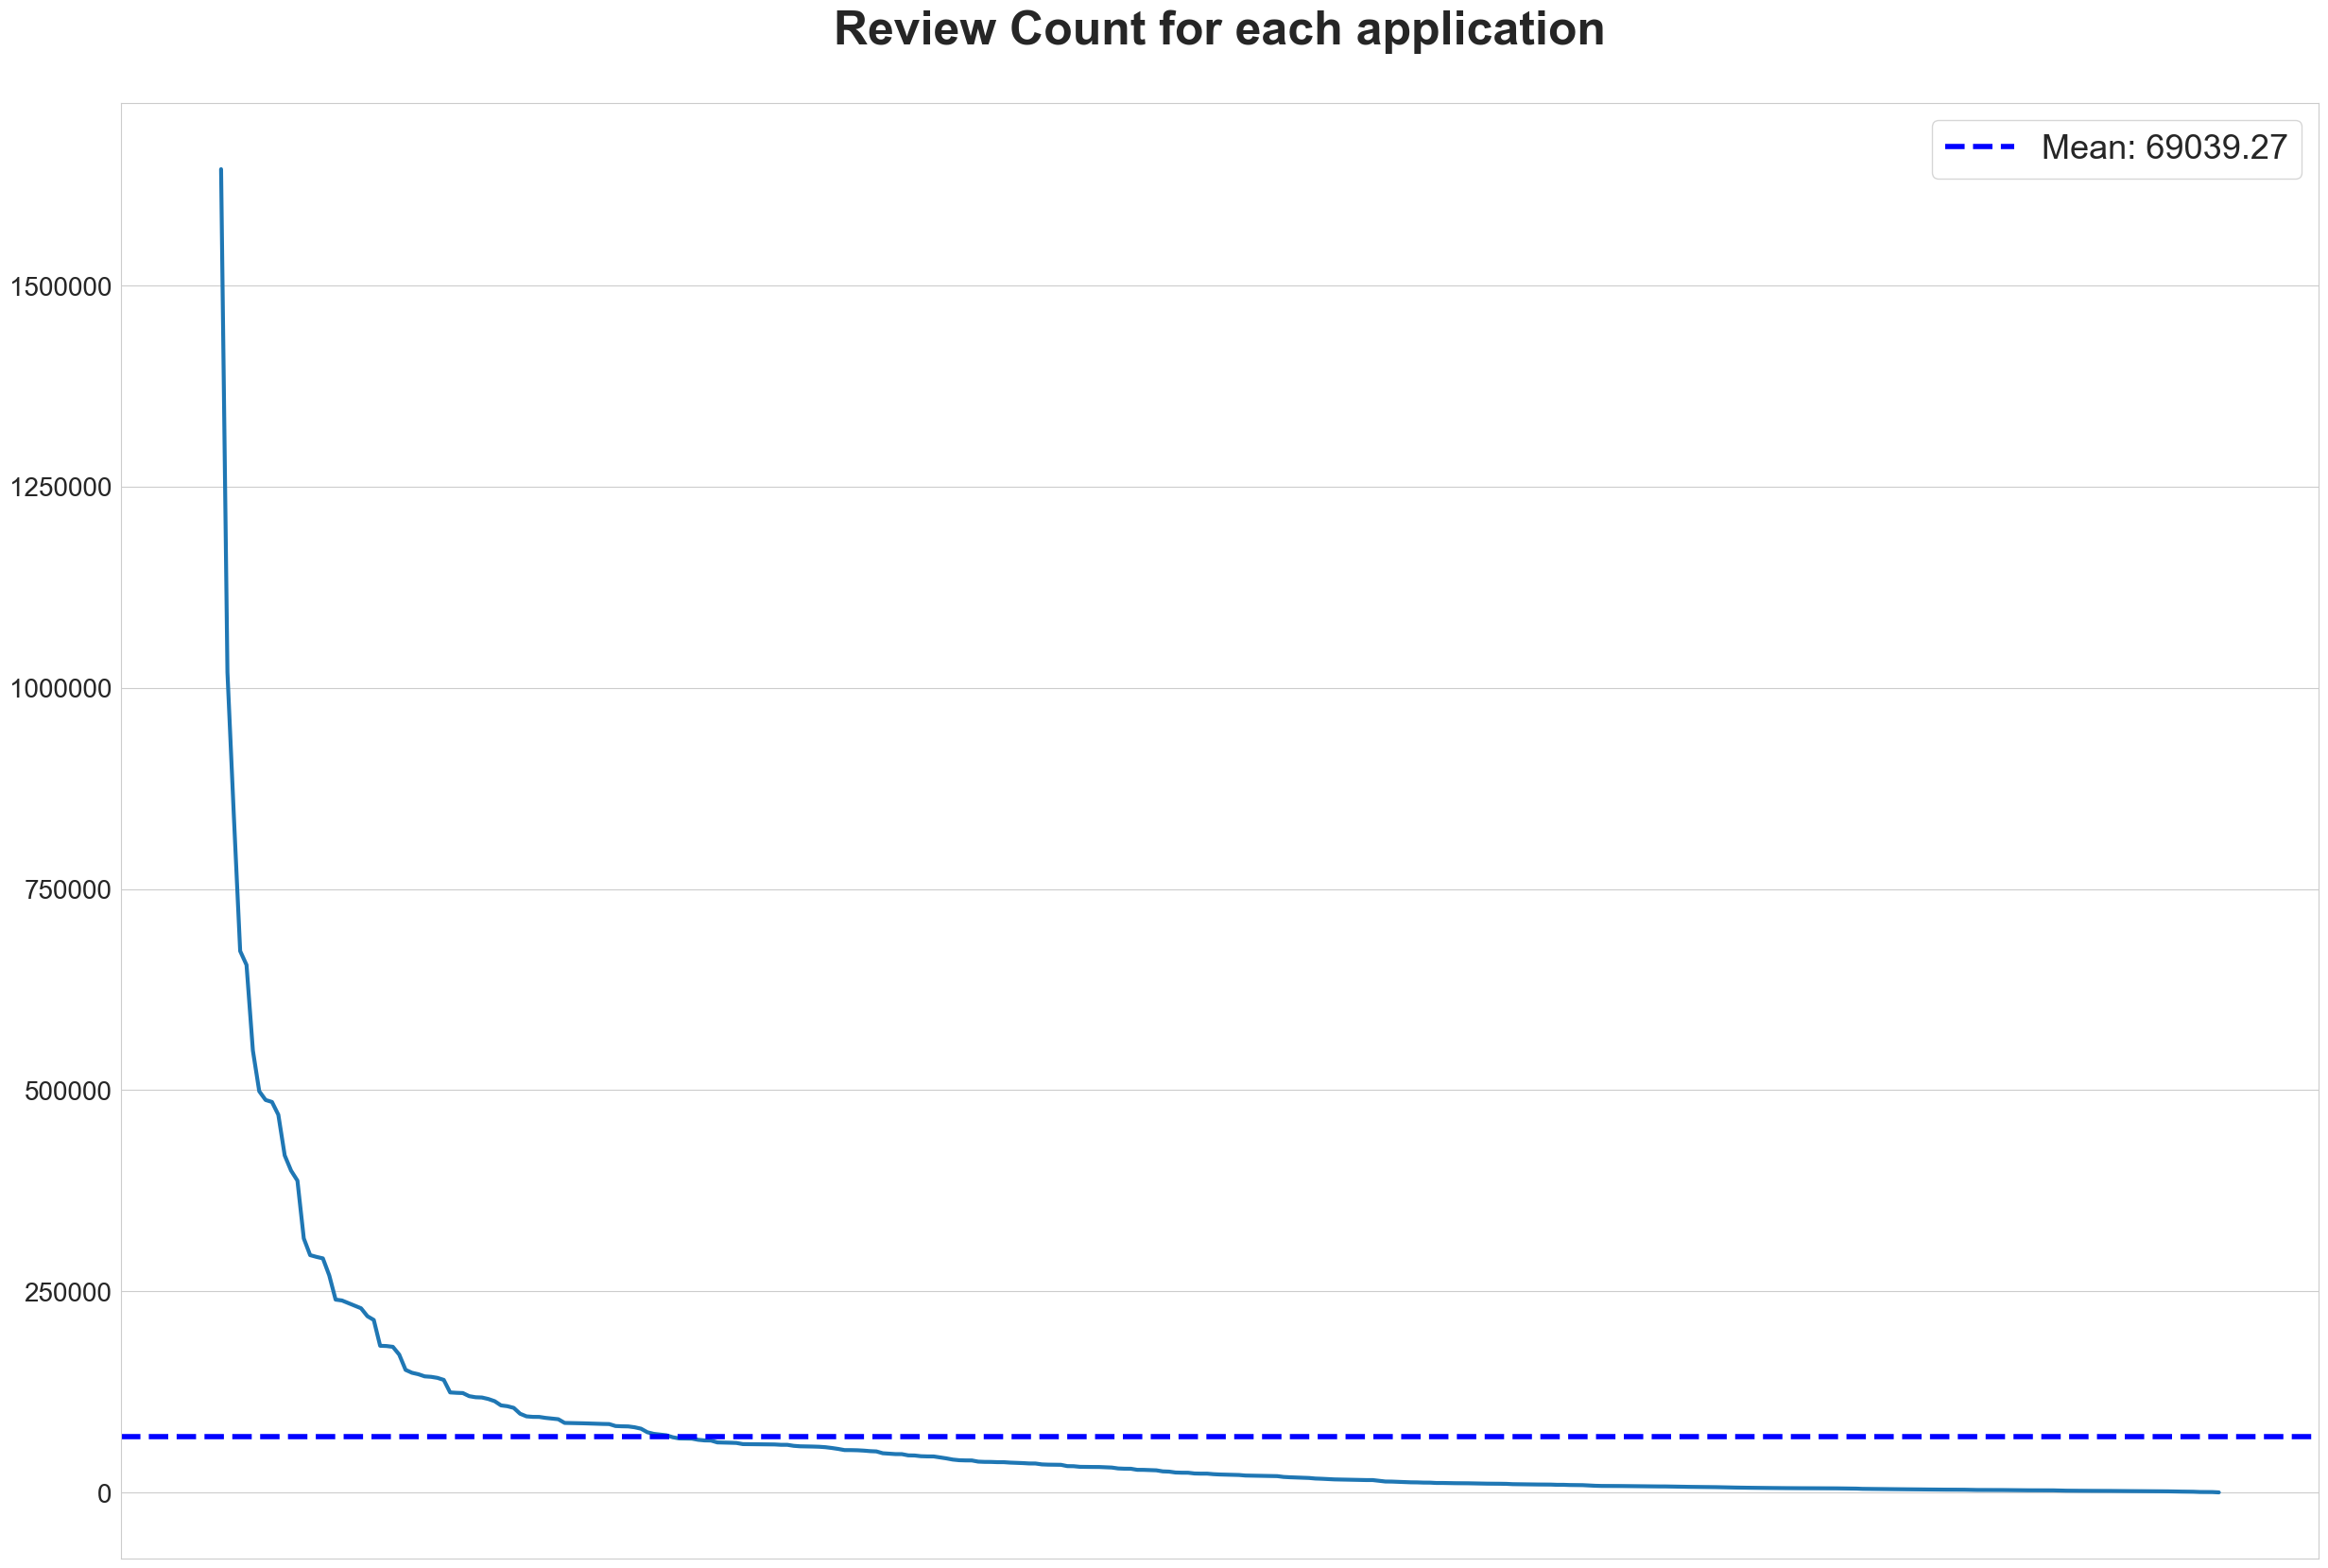

In [73]:
review_count = df['app_name'].value_counts()

plt.figure(figsize=(30, 20))
sns.set_style("whitegrid")
ax = sns.lineplot(
    x=review_count.index, 
    y=review_count.values,
    linewidth = 3
)

# adding the mean value for refereance 
mean_value = np.mean(review_count.values)
plt.axhline(y=mean_value, color='b', lw=4, label=f'Mean: {mean_value:.2f}', linestyle = '--')
ax.xaxis.set_label_position('top')
ax.tick_params(axis='both',  labelsize = 20)

#this changes the notation for the numbers on the y axis 
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')

plt.xticks([])
ax.set_title('Review Count for each application\n', fontsize = 36, fontweight='bold')
ax.set_xlabel(None)
plt.legend(fontsize=26, loc = 'upper right' )

plt.show()

>If we want to see the name of each app in the plot we could also use this alternative visualization 

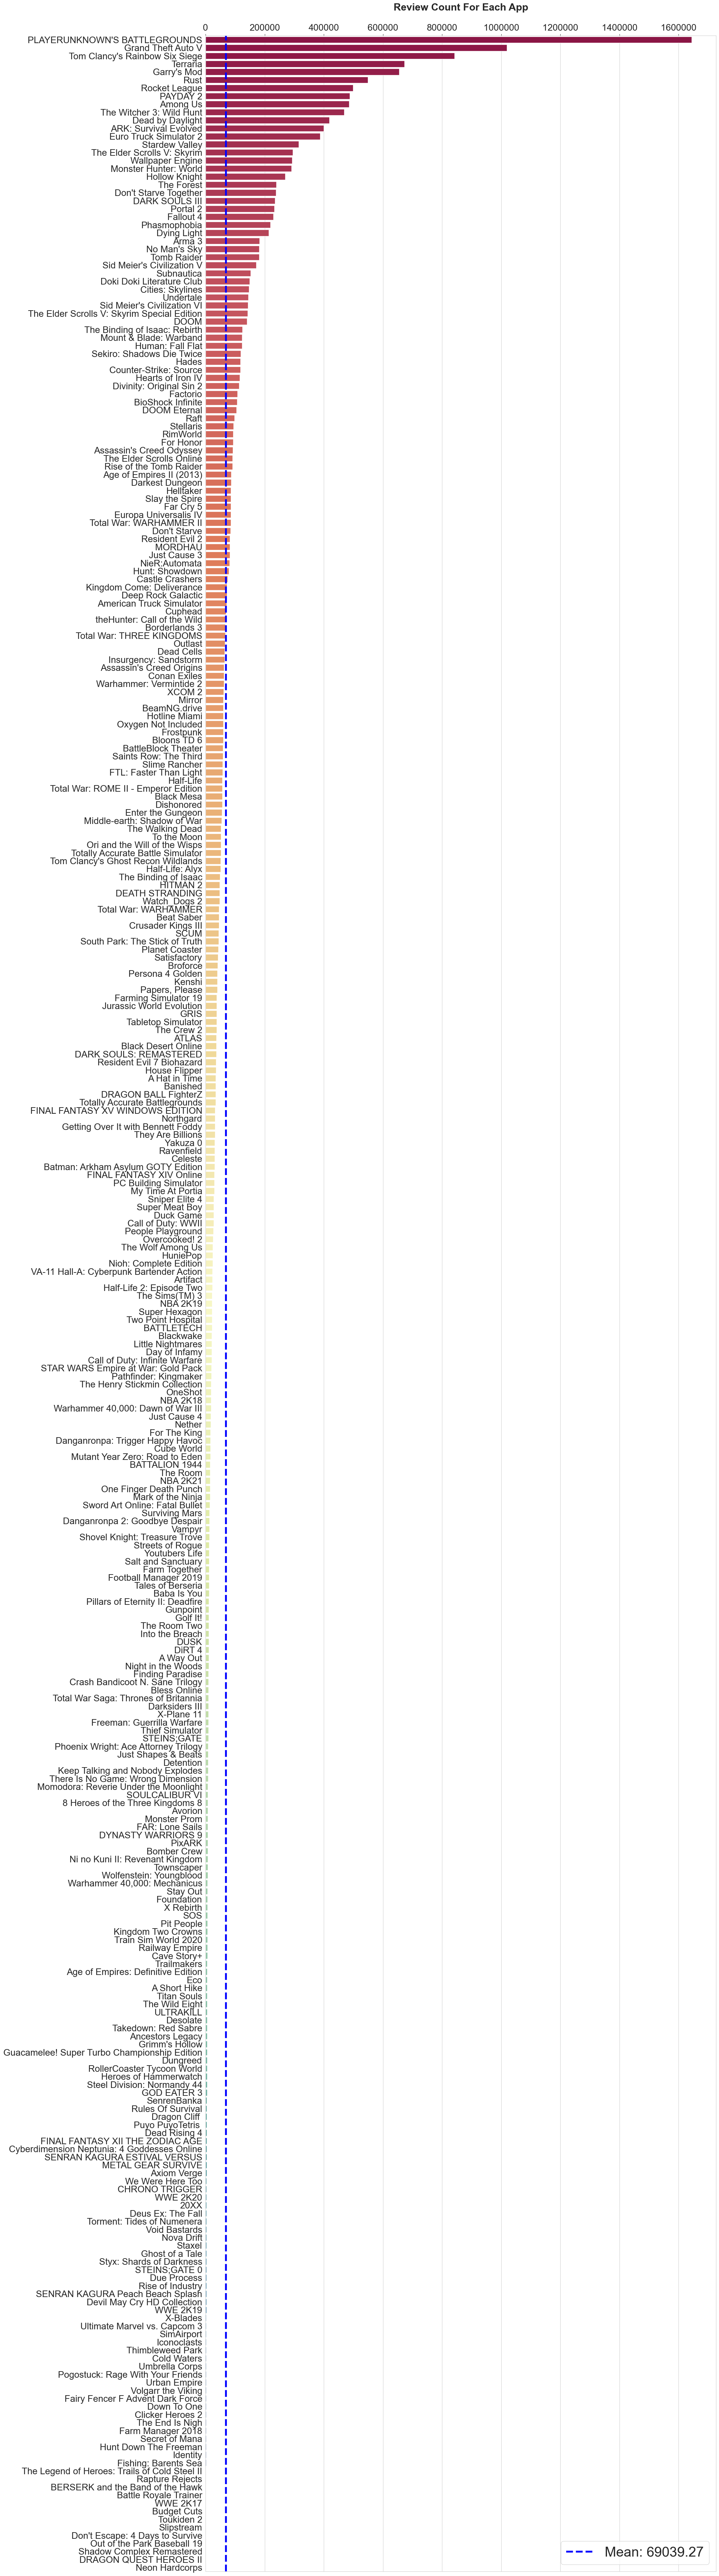

In [74]:
review_count = df['app_name'].value_counts()

plt.figure(figsize=(20, 100))
sns.set_style("whitegrid")
ax = sns.barplot(
    x=review_count.values, 
    y=review_count.index, 
    hue=review_count.index, 
    palette='Spectral',
    orient='h'
)

mean_value = np.mean(review_count.values)
plt.axvline(x=mean_value, color='b', lw=4, label=f'Mean: {mean_value:.2f}', linestyle = '--')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(axis='both',  labelsize = 20)
ax.get_xaxis().get_major_formatter().set_scientific(False)

ax.set_title('Review Count For Each App\n', fontsize = 22, fontweight='bold')
ax.set_ylabel(None)
plt.legend(fontsize=30, loc = 'lower right' )

plt.show()




In [75]:
# calculate the percentage of the reviews associated with the top 10 apps for number of reviews
top_10 = review_count.iloc[0:10]
percent_top_10 = f"{sum(top_10.values)/sum(review_count.values):.1%}"
print(f"Percentage of the total reviews, given to the top 10 apps: {percent_top_10}\n")

# difference between first and second app in number of reviews
print(f"Ratio of the number of reviews for the first and second game: {top_10.iloc[0]/top_10.iloc[1]:.1f}\n")

#number of applications under the mean
above_mean = review_count.loc[review_count.values > mean_value].count()
print(f"Number of applications that are over the mean: {above_mean}")

Percentage of the total reviews, given to the top 10 apps: 33.7%

Ratio of the number of reviews for the first and second game: 1.6

Number of applications that are over the mean: 71


>Looking at the plot, most of the apps have a count lower than the average; in fact, only 71 of 315 total apps are above this threshold. The graph is clearly right-skewed and shows that the first 5 to 10 apps have significantly higher review counts than the rest. The top 10 apps by number of reviews alone make up almost 34% of the total reviews. The game called "PLAYERUNKNOWN'S BATTLEGROUNDS" also has a number of reviews 1.6 times than the second application on the list which is a huge difference.

---
## 2.3
### For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.
---


In [76]:
#select the top 5 apps names
top_apps = review_count.index[:5]

#get the rows from the original dataframe corresponding to these names

top_apps_df = df.query('app_name in @top_apps')

# now group by app_names to show all the combinations for the two columns
# steam_purchase and received_for_free
top_apps_df.groupby('app_name')[['steam_purchase','received_for_free']].value_counts()

app_name                        steam_purchase  received_for_free
Garry's Mod                     True            False                 533729
                                False           False                  97030
                                True            True                   17521
                                False           True                    7244
Grand Theft Auto V              True            False                 873339
                                False           False                 107153
                                True            True                   31949
                                False           True                    6675
PLAYERUNKNOWN'S BATTLEGROUNDS   True            False                1329132
                                False           False                 253680
                                True            True                   43589
                                False           True                   17854
Terraria  


>Now, immediately, we can notice something unexpected: the variables **steam_purchase** and **received_for_free** are <u>not mutually exclusive</u>. Also, there are many reviews left by users who neither bought the game on the Steam store nor received it for free.
<br>
Firstly, we could theorize that Steam registers a user (in this dataset) as having bought the game even if they received it for free and then bought an expansion or a DLC. Secondly, it is possible that many reviewers left a recommendation on Steam without owning the game or possibly having bought it on another platform.


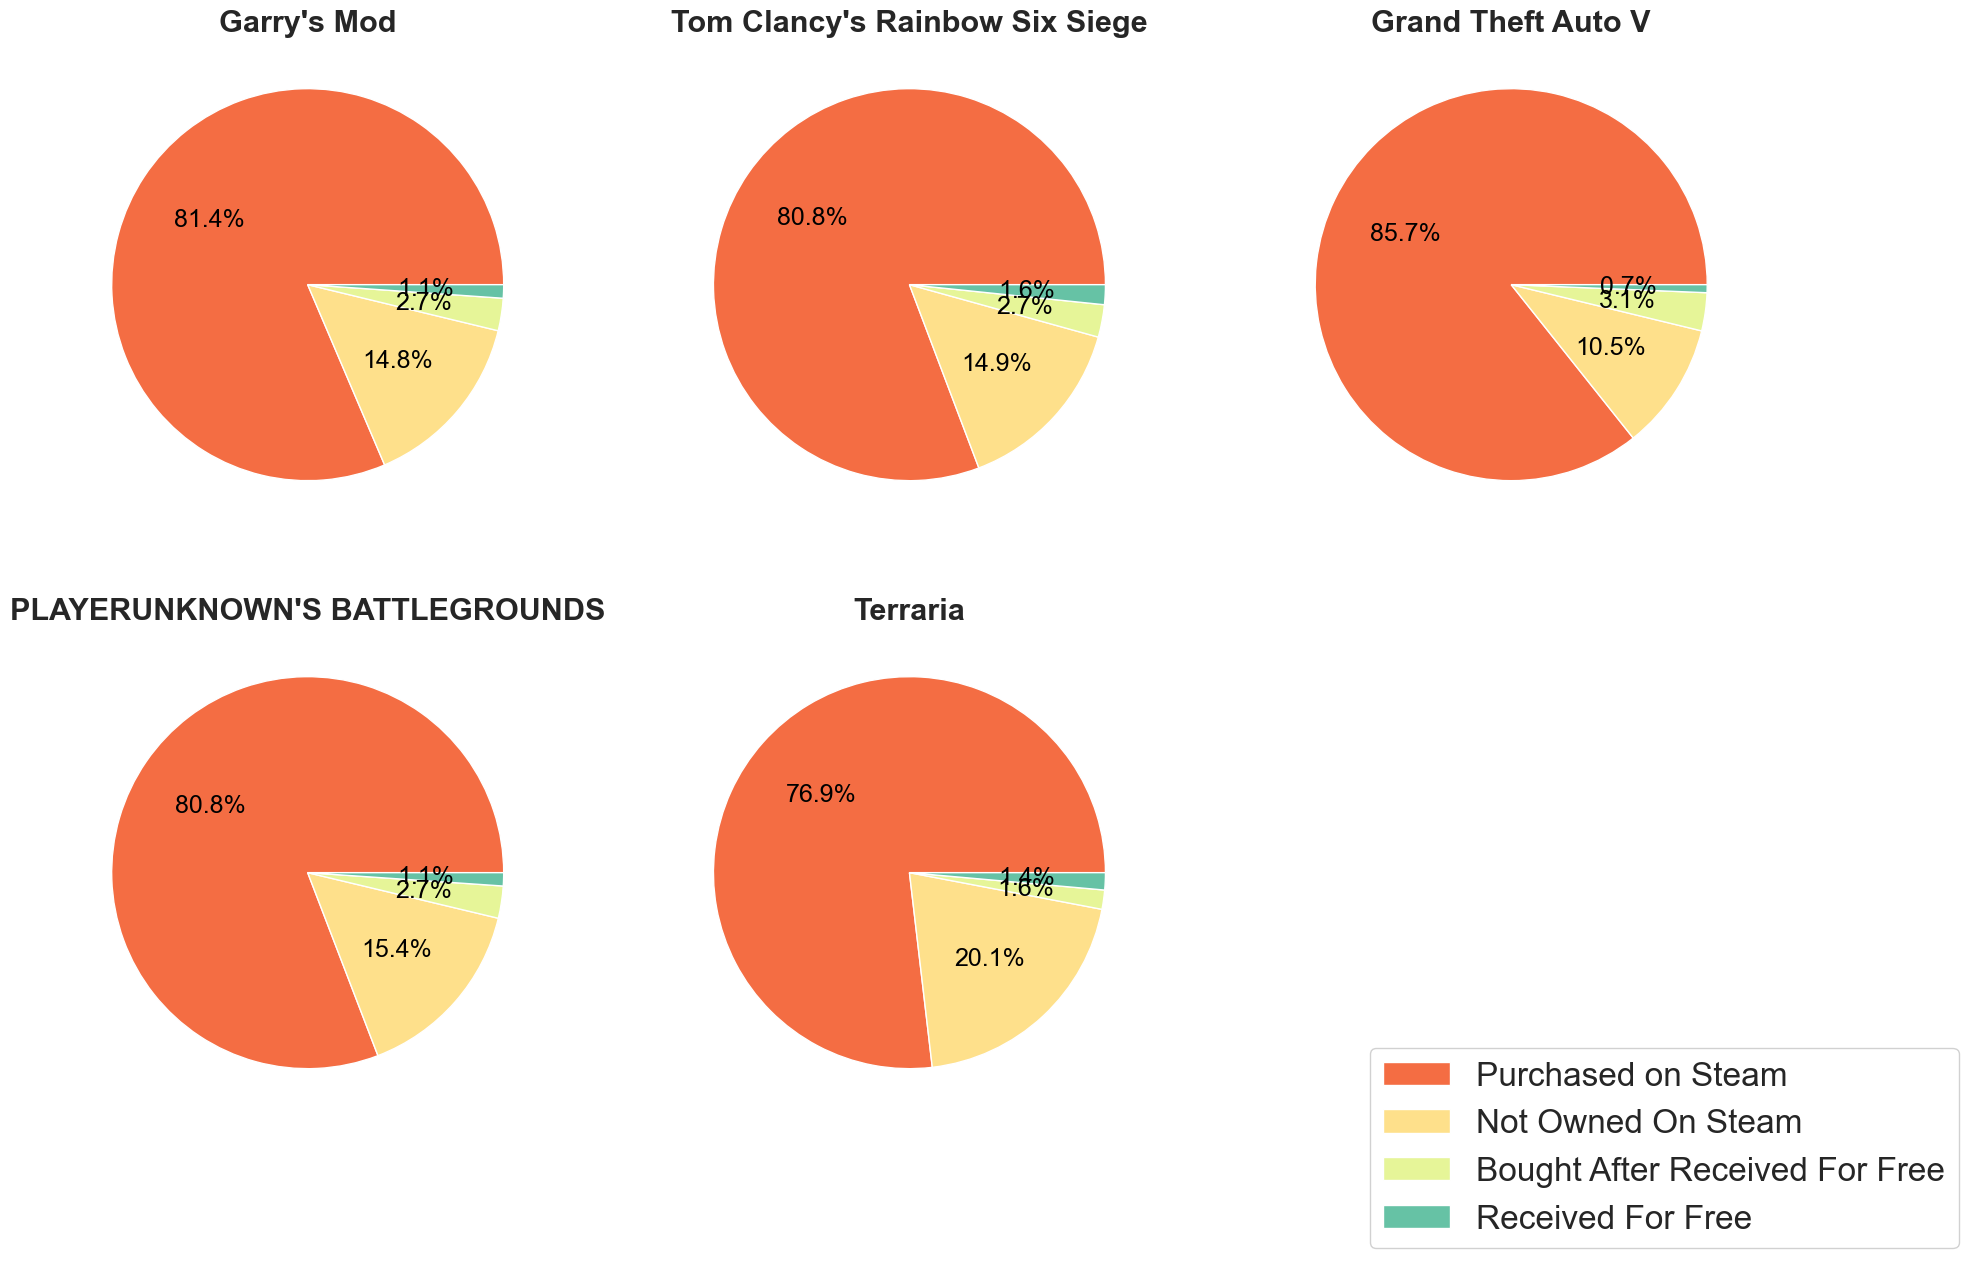

In [77]:
sns.set_style("whitegrid") 

# Firstly, we create a figure with 6 spaces: 2 rows and 3 columns for readability.
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(22, 14))
ax = ax.flatten()


purchase_df = top_apps_df.groupby('app_name')[['steam_purchase','received_for_free']].value_counts()

# We create a list with all the labels
lab = ['Purchased on Steam', 'Not Owned On Steam', 'Bought After Received For Free', 'Received For Free']

palette = sns.color_palette("Spectral", 4)


for index, game in enumerate(top_apps_df['app_name'].unique()):
    
    game_data = purchase_df.loc[game]
    count = [i for i in game_data.values]

    #we create the pieplot with the values in purchase_df for each application
    ax[index].pie(count, colors = palette, autopct='%.1f%%', textprops={'fontsize': 18, 'color': 'black'})
    ax[index].set_title(f"{game}",  fontsize=22, fontweight='bold')

fig.delaxes(ax[5]) #we delite one space in the figure as we have only 5 plots

fig.legend(labels = lab, loc='lower right', fontsize = 24, title_fontsize= 16, framealpha = 0.9)

plt.show()



> All the top 5 applications seem to have more or less the same distribution among the 4 highlighted categories. As we can see, the vast majority of reviews come from users who have bought the application on Steam. The second largest group of reviews comes from users who don't own the game on Steam.


---
## 2.4 
### Which applications have the most and the least user recommendations? Summarize your findings.
---


Lets take a look at the top and lower five applications for number of **positive** recommendations.

In [78]:
# subsetting to only rows with variable "recommended" equals true
rec_df = df.loc[df['recommended'] == True]

rec_df['app_name'].value_counts()

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     886417
Grand Theft Auto V                831311
Tom Clancy's Rainbow Six Siege    742397
Terraria                          658741
Garry's Mod                       632558
                                   ...  
Out of the Park Baseball 19          594
Shadow Complex Remastered            587
Identity                             439
DRAGON QUEST HEROES II               423
Neon Hardcorps                        89
Name: count, Length: 315, dtype: int64

As could have been expected, the top five games for the number of positive recommendations are the same as the top five for the number of reviews, indicating that the most popular games are also the most frequently reviewed. The same is true for the lowest five applications, which have also remained the same. This could indicate a direct relationship between the number of reviews and the total number of positive recommendations.


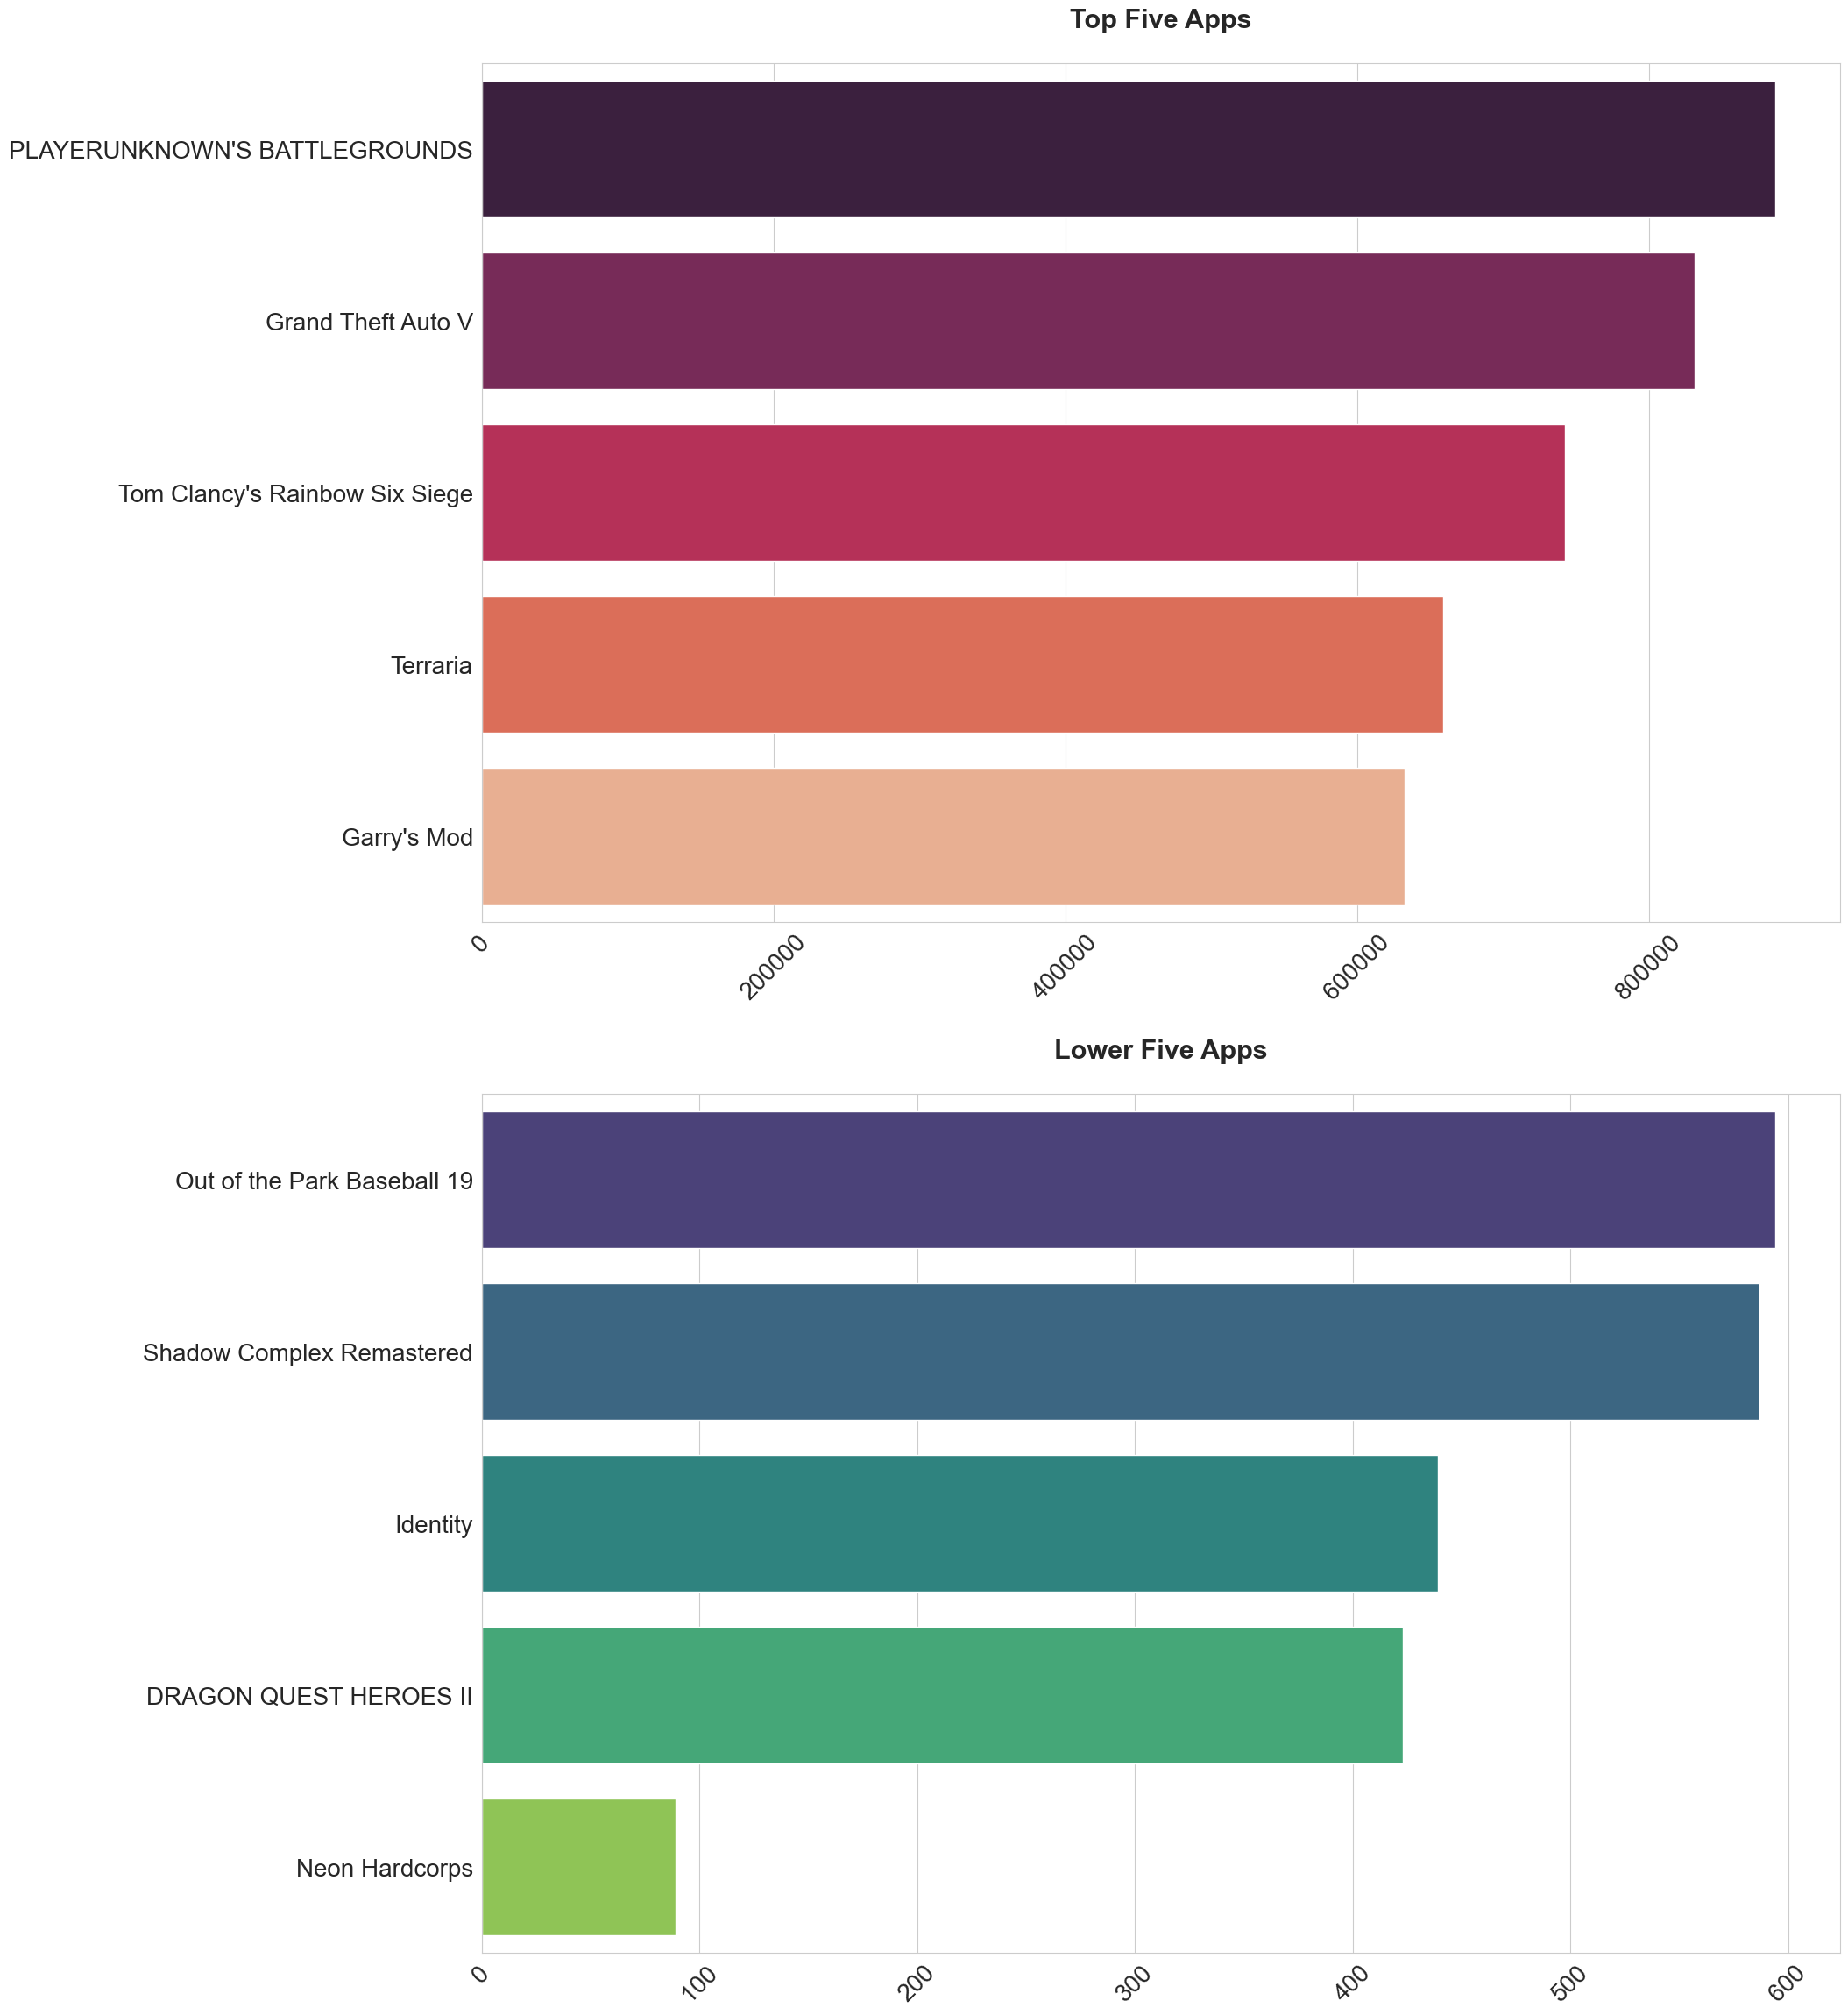

In [79]:
top_5 = rec_df['app_name'].value_counts()[:5]
lower_5 = rec_df['app_name'].value_counts()[-5:]

sns.set_style("whitegrid") 

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 28))


sns.barplot(x = top_5.values, y = top_5.index, ax=  ax[0], hue= top_5.index, palette = 'rocket', orient='h')
ax[0].set_title('Top Five Apps\n', fontsize = 22, fontweight='bold')
ax[0].tick_params(axis='x', rotation =45, labelsize = 20)
ax[0].tick_params(axis='y',  labelsize = 20)
ax[0].set_ylabel(None)


sns.barplot(x = lower_5.values, y = lower_5.index, hue= lower_5.index,ax = ax[1], palette = 'viridis', orient='h')
ax[1].set_title('Lower Five Apps\n', fontsize = 22,fontweight='bold')
ax[1].tick_params(axis= 'x', rotation= 45, labelsize = 20)
ax[1].tick_params(axis='y',  labelsize = 20)
ax[1].set_ylabel(None)

plt.show()


---
## 2.5 

### Is there a correlation between the number of recommendations and the applications' review scores?
---

To answer this we first need to decide how to create the variable "Applications' review scores. Our approach is to calculate the ratio between the number of positive and negatives review for each game, then we can categorise this values into a scale of 1 to 10, with the tenth bin having as an upper limit the highest score in the dataset.

In [80]:
# we already created a df with all the positive reviews: rec_df
# we then only need to get the number of positive recommendations for each app

N_pos = rec_df['app_name'].value_counts()

# we then create the df with the negative reccomendations
rec_neg_df = df.loc[df['recommended'] == False]

N_neg = rec_neg_df['app_name'].value_counts()

# Align N_neg with N_pos by reindexing it to match the order of N_pos so that when merged it won't create errors
N_neg_aligned = N_neg.reindex(N_pos.index)


# Create the merged DataFrame
merged_df = pd.DataFrame({
    'app_name': N_pos.index,  # The index from N_pos (or N_neg after aligning)
    'positive_count': N_pos.values,
    'negative_count': N_neg_aligned.values  # Aligned N_neg values
})


#and we add a new column for the app's scores

merged_df['Ratio'] = merged_df['positive_count'] / merged_df['negative_count']

# we then divide the ratios into 10 bins based on their value
merged_df['Score'] = pd.qcut(merged_df['Ratio'], 10, labels=range(1, 11))

#here the value of 10 corresponds to the bin with maximum value corresponding to the maximum in the column Ratio

# we convert the labels to integers
merged_df['Score'] = merged_df['Score'].astype(int)

# we add a new column with the total number of recommendations
merged_df['Total_Rec'] = merged_df['positive_count'] + merged_df['negative_count']

# We remove the unused columns
merged_df.drop('positive_count', axis = 1, inplace= True)
merged_df.drop('negative_count', axis = 1, inplace= True)
merged_df.drop('Ratio', axis = 1, inplace= True)

merged_df

app_name  Score  Total_Rec
0     PLAYERUNKNOWN'S BATTLEGROUNDS      1    1644255
1                Grand Theft Auto V      3    1019116
2    Tom Clancy's Rainbow Six Siege      5     841918
3                          Terraria     10     672815
4                       Garry's Mod      8     655524
..                              ...    ...        ...
310     Out of the Park Baseball 19      4        700
311       Shadow Complex Remastered      4        700
312                        Identity      1       1804
313          DRAGON QUEST HEROES II      2        600
314                  Neon Hardcorps      1        200

[315 rows x 3 columns]

Now we can analyse the correlation using both a scatterplot and the Pearson correlation coefficient:

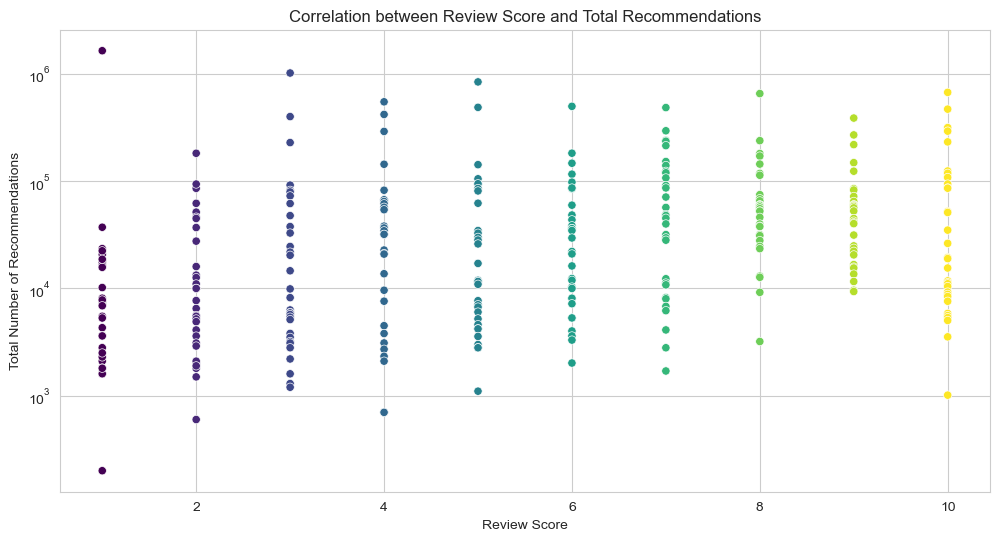

In [81]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='Score', y='Total_Rec', hue='Score', palette='viridis', legend= False)

# Add labels and title
plt.xlabel('Review Score')
plt.ylabel('Total Number of Recommendations')
plt.title('Correlation between Review Score and Total Recommendations')
plt.yscale('log')  # Optional: use a log scale for better visualization if needed

# Show the plot
plt.show()

In [82]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
pearson_corr, pearson_p = pearsonr(merged_df['Score'], merged_df['Total_Rec'])
print(f"Pearson Correlation Coefficient: {pearson_corr:.3f}, p-value: {pearson_p:.3e}")



Pearson Correlation Coefficient: 0.080, p-value: 1.591e-01


Looking at this scatterplot and the results of the Pearson Correlation Test, it is evident that there is no clear correlation between the variables. The Pearson Correlation Coefficient is close to zero (0.080), which indicates an absence of a linear relationship. Additionally, the shape of the point cloud in the scatterplot does not suggest any discernible trend or relationship in the data. 

---
## RQ6
---

## 6.1
### Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?

In [ ]:
# We create a df with only the columns we will need
df = pd.read_csv(csv_file_path, usecols = ['author.steamid', 'language',
                                                 'author.num_games_owned', 'author.num_reviews',
                                                   'timestamp_updated', 'timestamp_created'])



In [84]:
# just for readability we convert the time stamps into a date

df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
df['timestamp_updated'] = pd.to_datetime(df['timestamp_updated'], unit='s')


In [85]:
#now we can create two datasets related to the two languages

df_eng = df.loc[df['language'] == 'english']

df_spa = df.loc[df['language'] == 'spanish']

# take the length of this two dataset to compare them in size:

print(f"Number of reviews in english: {len(df_eng)}\nNumber of reviews in spanish: {len(df_spa)}")



Number of reviews in english: 9635437
Number of reviews in spanish: 813320


There are many more reviews left in english than in spanish as we also showed in the preliminary analysis done at the beginning of this notebook. We now will calculate the percentage for both languages of these reviews that has been updated.

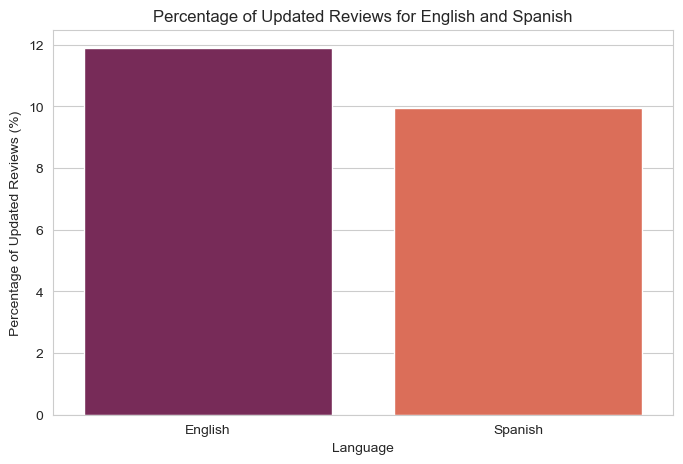

In [86]:
# we count how many reviews have been updated for both languages

updated_eng = df_eng.loc[df['timestamp_created'] != df['timestamp_updated']].count()
updated_spa = df_spa.loc[df['timestamp_created'] != df['timestamp_updated']].count()

#then calculate the percentages 
perc_eng = updated_eng / len(df_eng)
perc_spa = updated_spa/ len(df_spa)

# create a DataFrame to store the percentages for plotting
perc_df = pd.DataFrame({
    'Language': ['English', 'Spanish'],
    'Percentage': [perc_eng.iloc[0] * 100, perc_spa.iloc[0] * 100] 
})
# and plot the two percentages
plt.figure(figsize=(8, 5))
sns.barplot(x='Language', y='Percentage', data = perc_df, palette='rocket', hue = 'Language')
# create the labels for the axis and add the plot title
plt.ylabel('Percentage of Updated Reviews (%)')
plt.xlabel('Language')
plt.title('Percentage of Updated Reviews for English and Spanish')

# Display the plot
plt.show()


This plot shows us that the group that left the reviews in english is slightly more likelly to edit their review, but the difference is not very big. This could be due to the fact that many of the reviews left in english where not made by native english speakers, and could have made mistakes.

In [87]:
# Now we want to see how much time on average passes between the creation of the review and the update

#First we take only the reviews that have been updated and calculate the difference in seconds
updated_eng= df_eng.loc[df['timestamp_created'] != df['timestamp_updated']]

updated_spa= df_spa.loc[df['timestamp_created'] != df['timestamp_updated']]

updated_eng['time_difference'] = (updated_eng['timestamp_updated'] - updated_eng['timestamp_created']).dt.total_seconds()
updated_spa['time_difference'] = (updated_spa['timestamp_updated'] - updated_spa['timestamp_created']).dt.total_seconds()

#then calculate the average time difference in hours

average_time_difference_eng = updated_eng['time_difference'].mean() / 3600  
average_time_difference_spa = updated_spa['time_difference'].mean() / 3600  


# display the average time difference for English and Spanish reviews
print(f"Average time difference (in hours):\n english: {average_time_difference_eng:.2f}\nspanish: {average_time_difference_spa:.2f}\n")
print(f"Average time difference (in days):\n english: {average_time_difference_eng/24:.2f}\nspanish: {average_time_difference_spa/24:.2f}\n")


Average time difference (in hours):
 english: 8093.17
spanish: 7877.79

Average time difference (in days):
 english: 337.22
spanish: 328.24



/var/folders/rd/fmxvjkpj5nb3vj3ky9f3tssm0000gn/T/ipykernel_73550/1684673699.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_eng['time_difference'] = (updated_eng['timestamp_updated'] - updated_eng['timestamp_created']).dt.total_seconds()
/var/folders/rd/fmxvjkpj5nb3vj3ky9f3tssm0000gn/T/ipykernel_73550/1684673699.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_spa['time_difference'] = (updated_spa['timestamp_updated'] - updated_spa['timestamp_created']).dt.total_seconds()


However this is not very plausible since on average the reviews were updated almost a year after having been created, so it is more plausible that the reviews changed their opinion after playing the game or receiving an expansion.

---
## 6.2
### Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews. What can you say about the number you just calculated?
---

The same way as what we will have to do for the RQ7 we will need to remove some outliers from the dataset (this as been explained and justyfied in more details there) that could otherwise influence the means we are trying to calculate.

In [88]:

# just to show how big are the outliers in this dataset we will print the maximum of the variable games owned
print(max(df['author.num_games_owned']))
# this number is of course impossible

# we will then remove every value above the 99.9% quantile
q = df['author.num_games_owned'].quantile(0.999)
q_rev = df['author.num_reviews'].quantile(0.999)


new_df_filtered = df.loc[df['author.num_games_owned'] <= q]
new_df_filtered = new_df_filtered.loc[new_df_filtered['author.num_reviews'] <= q_rev]

# Now we can calculate the means with respeact to the different languages
mean_values = new_df_filtered.groupby('language')[['author.num_games_owned', 'author.num_reviews']].mean()

print(mean_values)


4398046511619
            author.num_games_owned  author.num_reviews
language                                              
brazilian                   98.009               9.075
bulgarian                   70.257               6.983
czech                      102.854               8.756
danish                      75.802               5.400
dutch                       77.059               5.408
english                    159.674              11.099
finnish                     93.666               7.738
french                     119.816               8.617
german                     134.019               8.467
greek                       68.916               6.617
hungarian                  100.153               8.179
italian                    133.951              11.470
japanese                   172.920              12.708
koreana                     90.604              10.988
latam                      129.718              11.599
norwegian                   86.175               5.

In [89]:
# Reset the index to make 'language' a column in mean_values
mean_values = mean_values.reset_index()

# Filter the mean values for English and Spanish
mean_eng = mean_values.loc[mean_values['language'] == 'english']

mean_spa = mean_values.loc[mean_values['language'] == 'spanish']

Averages for english group:
[159.67408561  11.09908876]

Averages for spanish group:
[116.99540151   9.05697081]

Ratio for english group: 14.39 

Ratio for spanish group: 12.92 



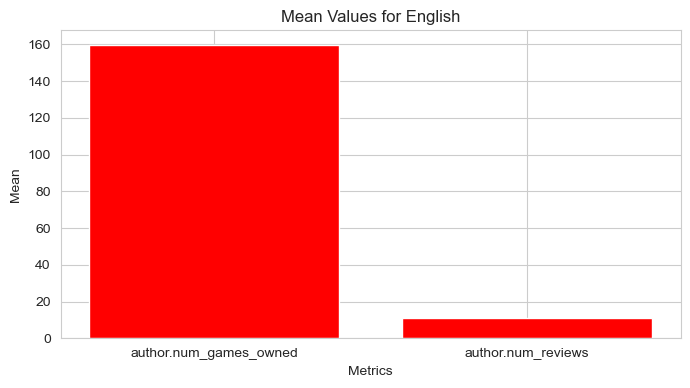

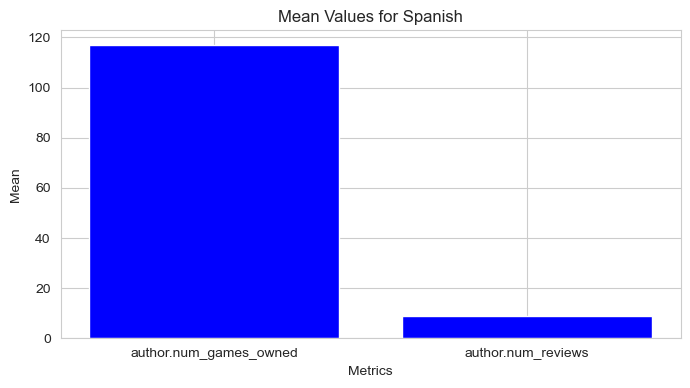

In [90]:
#also produce the ratio between the two means: num_games/num_reviews
ratio_eng = (mean_eng['author.num_games_owned'].values/mean_eng['author.num_reviews'].values).astype(float)
ratio_spa = (mean_spa['author.num_games_owned'].values/mean_spa['author.num_reviews'].values).astype(float)


print(f"Averages for english group:\n{mean_eng[['author.num_games_owned','author.num_reviews']].values[0]}\n")
print(f"Averages for spanish group:\n{mean_spa[['author.num_games_owned','author.num_reviews']].values[0]}\n")
print(f"Ratio for english group: {ratio_eng[0]:.2f} \n")
print(f"Ratio for spanish group: {ratio_spa[0]:.2f} \n")
# had to do some strange slicing to have a good print

# Plot for English
plt.figure(figsize=(8, 4))

plt.bar(mean_eng.columns[1:], mean_eng.values[0][1:], color='red')
plt.title('Mean Values for English')
plt.xlabel('Metrics')
plt.ylabel('Mean')
plt.show()

# Plot for Spanish
plt.figure(figsize=(8, 4))

plt.bar(mean_spa.columns[1:], mean_spa.values[0][1:], color='blue')
plt.title('Mean Values for Spanish')
plt.xlabel('Metrics')
plt.ylabel('Mean')
plt.show()

Both for the english reviews and the spanish reviews left by the users, the plot shows that on average the reviews own many more games than reviews, to be more precise:
The english group has a ratio of 14.39 and the spanish group of 12.92. 
This suggest that the reviews review only a small part of the games they own, but this is also not compleately true: It could also be that many of the reviews were left for games that were not in the Steam collection of the users as we showed in RQ2 (point 2.3). This means that this ratio may be even larger if it could be properly calculated accounting for that.

# RQ7
---
## 7.1 & 7.2

### P1 = "probability of submitting a review and receiving at least one helpful vote"
### P2 = "probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app"
---


In [91]:
df = pd.read_csv(csv_file_path, usecols = ['app_name',
                                                 'recommended',
                                                 'review',
                                                 'votes_helpful',
                                                 'author.steamid',
                                                 'author.num_games_owned',
                                                 'author.num_reviews'])


In [92]:
df['votes_helpful'].describe()

count        21747371.000
mean           404468.855
std        1333740760.952
min                 0.000
25%                 0.000
50%                 0.000
75%                 1.000
max     4398046511106.000
Name: votes_helpful, dtype: float64

We can see from this short description of the variable **votes_helpful** that there are some impossibly high instances, as indicated by the maximum. Let's look for this outliers!

In [93]:
q = df['votes_helpful'].quantile(0.999)

count_q = df['votes_helpful'].loc[df['votes_helpful'] > q].count()
totcount = df['votes_helpful'].count()

print(f"the 0.999 quantile: {q} \nThe total number of values in votes_helpful: {totcount} \nThe number of values above 0.999 quantile: {count_q} ")

the 0.999 quantile: 240.0 
The total number of values in votes_helpful: 21747371 
The number of values above 0.999 quantile: 21637 


As we can see there are many outliers in this dataset, many of this values could be possible but taking a look at the maximum value of 4,398,047,000,000 there is no mistake that this is an error.

Let's take a look at the rows with the two largest values

In [94]:
# get the largest two values
df.loc[df['votes_helpful'] > 1000000]

app_name                                             review  \
10449392     Broforce  Jogo muito bom. Recomendo ele, vale cada centa...   
10751984  Bloons TD 6  I don't know what to say, but just to go pop s...   

          recommended  votes_helpful     author.steamid  \
10449392         True  4398046511104  76561198315745673   
10751984         True  4398046511106  76561198049020554   

          author.num_games_owned  author.num_reviews  
10449392                     100                   2  
10751984                    3524                 322

Using their SteamId values it is actually possible to find online the users and their reviews and we could of course correct the dataset:

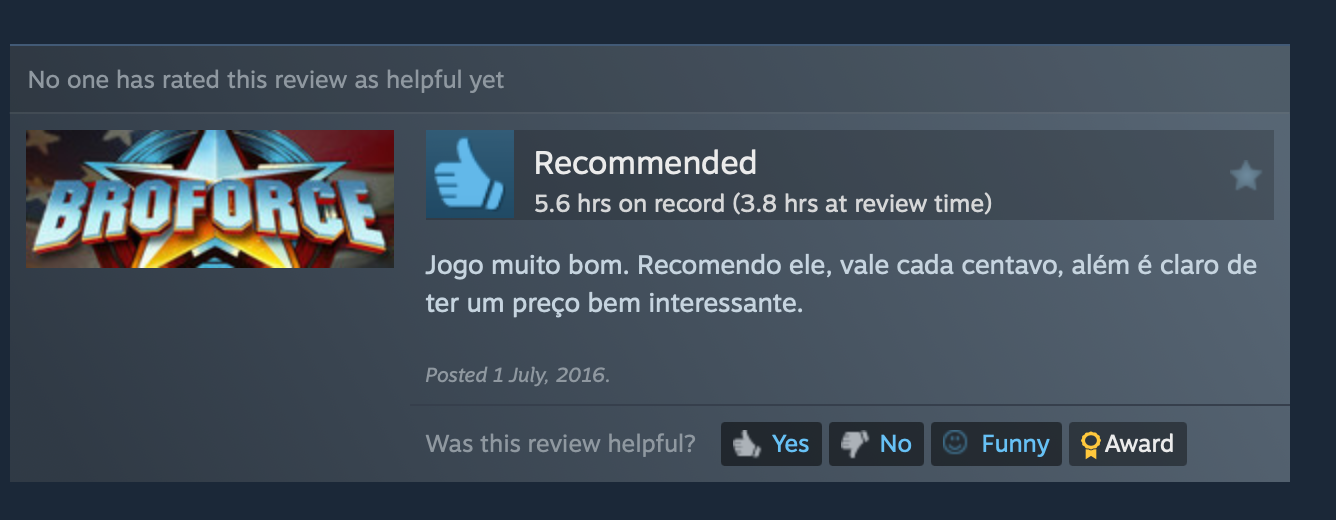

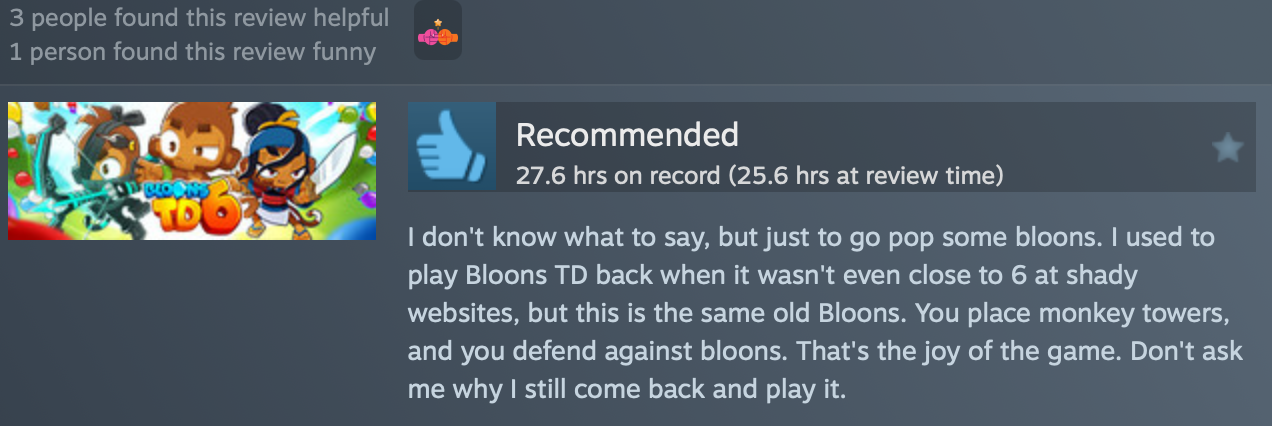

In [95]:
# modify the original df
df.loc[df['votes_helpful'] > 1000000, 'votes_helpful'] = [0, 3]

#check 
df.loc[(df['app_name'] == 'Bloons TD 6') & (df['author.steamid'] == 76561198049020554) ]

app_name                                             review  \
10751984  Bloons TD 6  I don't know what to say, but just to go pop s...   

          recommended  votes_helpful     author.steamid  \
10751984         True              3  76561198049020554   

          author.num_games_owned  author.num_reviews  
10751984                    3524                 322

Doing this for all values above the 99.9% quantile would be of course impracticle. Therefore to be more conservative we chose to get rid of all values above the 99.9% quantile.

In [96]:
new_df_filtered = df.loc[df['votes_helpful'] <= q]
new_df_filtered['votes_helpful'].describe()

count   21725736.000
mean           1.199
std            7.609
min            0.000
25%            0.000
50%            0.000
75%            1.000
max          240.000
Name: votes_helpful, dtype: float64

## P1:

In [97]:
tot = len(new_df_filtered['votes_helpful'])
helpful_df = new_df_filtered.loc[new_df_filtered['votes_helpful'] >= 1, 'votes_helpful']
E = len(helpful_df)
prob = f"{E/tot:.1%}"
print(prob)

28.0%


## P2:

In [98]:
tot = len(new_df_filtered.loc[df['recommended']== False])
helpful_F_df = new_df_filtered.loc[(new_df_filtered['votes_helpful'] >= 1) & (new_df_filtered['recommended'] == False), 'votes_helpful']
E = len(helpful_F_df)
prob = f"{E/tot:.1%}"
print(prob)


48.3%


---
## 7.3

### Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review" ?
---

We can do this by creating a new dataframe with two categorical variables. The first will be true when the review received more than 1 helpful vote, the second when the author of the review has a number of reviews owned of at least five. We will use the df created before.

In [99]:
#create the new DataFrame
df = pd.DataFrame(columns=['Votes_Helpful', 'Number_of_Reviews'])

#check if the two conditions are true and add the result into the new columns
df['Votes_Helpful'] = np.where(new_df_filtered['votes_helpful'] >= 1, True, False)
df['Number_of_Reviews'] = np.where(new_df_filtered['author.num_reviews'] >= 5, True, False)

#let's create a contingency table:
contingency_table = pd.crosstab(df['Votes_Helpful'], df['Number_of_Reviews'])
print(contingency_table)

#apply chi square test of indipendence

chi2, p, dof, expected = chi2_contingency(contingency_table)

# and print the results
print("\nChi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)


Number_of_Reviews    False    True 
Votes_Helpful                      
False              9136432  6505696
True               2696540  3387068

Chi-square Statistic: 350347.77885149146
p-value: 0.0
Degrees of Freedom: 1
Expected Frequencies Table:
 [[8519520.93334909 7122607.06665091]
 [3313451.06665091 2770156.93334909]]


Since our dataframe contains a large number of observations we can compute the chi square test, this test's results are shown above. The p-value is practically zero, this tells us that we can refute the null hipotesys of indipendence and that therefore the two variables are actually dependent.

another way to quickly show this is by calculating: $$ P(A \cap B) = P(A) \times P(B) $$



In [100]:
N = len(df)

# probability of the review receiving at least one helpful vote
P_A = (df['Votes_Helpful'].loc[df['Votes_Helpful'] == True].count()) /N

# probability the reviewer has submitted at least five reviews before the current review
P_B = (df['Number_of_Reviews'].loc[df['Number_of_Reviews'] == True].count()) /N

# Interection:
Int = df.loc[(df['Number_of_Reviews'] == True) & (df['Votes_Helpful'] == True)].count()
# Probability of the intersection of these two events:
P_intersect = (Int.iloc[0]) /N

print(f"Probability of event A: {P_A}\nProbability of event B: {P_B}/n")
print(f"Product: {P_A*P_B}\nProbability of the intersection: {P_intersect}")

print(f"Is the equality confirmed? {P_intersect == P_A*P_B}")


Probability of event A: 0.2800184997184906
Probability of event B: 0.45534770375558276/n
Product: 0.12750578085589798
Probability of the intersection: 0.15590118558008806
Is the equality confirmed? False


---
### 7.4 
### Do reviewers who own a larger number of games likely leave fewer reviews on the platform?
---
We are now looking at two specific variables: author.num_games_owned and author.num_reviews (and not the number of reviews contained in the dataset for each author).
However since there are many reviews in this dataset left from the same authors, for the scope of this research question we should create a new dataset with one row for each author.steamid.

Let's see if the values for the two columns change between each row with the same steamid:

In [101]:
df = pd.read_csv(csv_file_path, usecols = ['app_name', 'author.steamid',
                                                 'author.num_games_owned', 'author.num_reviews', 'timestamp_updated', 'timestamp_created'])

df['author.steamid'].value_counts()

author.steamid
76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
                    ... 
76561198250262486      1
76561197994402900      1
76561198087460095      1
76561198024665035      1
76561198046495482      1
Name: count, Length: 12406560, dtype: int64

In [102]:
#let's take a look at the first one, but even before that let's convert the timestamps into readable dates

df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
df['timestamp_updated'] = pd.to_datetime(df['timestamp_updated'], unit='s')

#format

df['timestamp_created'] = df['timestamp_created'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['timestamp_updated'] = df['timestamp_updated'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [103]:
df.loc[df['author.steamid']==76561198062813911].describe()

author.steamid  author.num_games_owned  author.num_reviews
count               149.000                 149.000             149.000
mean  76561198062813920.000                1584.000            1621.000
std                  48.162                   0.000               0.000
min   76561198062813904.000                1584.000            1621.000
25%   76561198062813904.000                1584.000            1621.000
50%   76561198062813904.000                1584.000            1621.000
75%   76561198062813904.000                1584.000            1621.000
max   76561198062813904.000                1584.000            1621.000

Looking at this table and in particular at the standard deviation, we could infer that all the values for the columns "author.num_games_owned" and "author.num_reviews" will not change between different rows with the same steam_id value.
This however is not true as we can show for the second Id of the previous list.

In [104]:
#second id for number of reviews in the dataset
df.loc[df['author.steamid']==76561198315585536].describe()

author.steamid  author.num_games_owned  author.num_reviews
count               132.000                 132.000             132.000
mean  76561198315585536.000                1350.053            1103.189
std                   0.000                   1.584               3.469
min   76561198315585536.000                1349.000            1101.000
25%   76561198315585536.000                1349.000            1101.000
50%   76561198315585536.000                1350.000            1101.000
75%   76561198315585536.000                1350.000            1105.000
max   76561198315585536.000                1357.000            1114.000

To answer the original question we then have to decide how to treat this variability.

In [105]:
#let's take a look at some of the rows for this steam id
df.loc[df['author.steamid']==76561198315585536]

app_name    timestamp_created  \
270500       The Witcher 3: Wild Hunt  2019-04-10 00:33:55   
1119421                   Garry's Mod  2019-12-17 02:50:57   
1597361    Sid Meier's Civilization V  2019-10-05 02:38:52   
1979092              Dead by Daylight  2019-04-07 16:55:29   
2233484   Sid Meier's Civilization VI  2019-10-04 06:33:24   
...                               ...                  ...   
21285904    Resident Evil 7 Biohazard  2019-09-11 01:55:16   
21365310           Night in the Woods  2019-10-14 05:44:24   
21402577                    Northgard  2019-06-04 18:40:44   
21440420               Sniper Elite 4  2019-04-15 09:38:02   
21519602                Hollow Knight  2020-04-29 19:33:22   

            timestamp_updated     author.steamid  author.num_games_owned  \
270500    2019-04-10 00:33:55  76561198315585536                    1350   
1119421   2019-12-17 02:50:57  76561198315585536                    1350   
1597361   2019-10-05 02:38:52  76561198315585536                    1350   
1979092   2019-04-07 16:55:29  76561198315585536                    1349   
2233484   2019-10-04 06:33:24  76561198315585536                    1350   
...                       ...                ...                     ...   
21285904  2019-09-11 01:55:16  76561198315585536                    1350   
21365310  2019-10-14 05:44:24  76561198315585536                    1350   
21402577  2019-06-04 18:40:44  76561198315585536                    1350   
21440420  2019-04-15 09:38:02  76561198315585536                    1350   
21519602  2020-04-29 19:33:22  76561198315585536                    1349   

          author.num_reviews  
270500                  1114  
1119421                 1101  
1597361                 1101  
1979092                 1101  
2233484                 1114  
...                      ...  
21285904                1105  
21365310                1105  
21402577                1105  
21440420                1105  
21519602                1101  

[132 rows x 6 columns]

As we can see there are stange "inconsistencies" in the dataset, for example the number of reviews owned by this user of the platform jumps from 1101 in 07 April 2019 to 1114 in 04 Nov 2019 and then back to 1101 on 29 April 2020.
To use the values contained in these two columns and answer our research question we will take the mean for both and assign it to each row. Then we will eliminate all duplicate rows.

In [106]:
# Calculate the mean for each 'author.steamid' group for the specific columns
mean_values = df.groupby('author.steamid')[['author.num_games_owned', 'author.num_reviews']].transform('mean')
#The transform('mean') function computes the mean for each group created by groupby('author.steamid') 
#and returns a DataFrame where each row has the mean value for its group. 
# But most importantly it does this preserving the original rows' structure.

# Assign the calculated mean back to the original DataFrame is easy 
df[['author.num_games_owned', 'author.num_reviews']] = mean_values.astype(int)

# we rounded the means because the two columns contained count values

new_df = df[['author.steamid','author.num_games_owned','author.num_reviews']].drop_duplicates(subset = 'author.steamid') 
# this function drops all repeating occurrencies of the variable steamid keeping only the first one



In [107]:
new_df 

author.steamid  author.num_games_owned  author.num_reviews
0         76561199095369542                       6                   1
1         76561198949504115                      30                   9
2         76561199090098988                       5                   1
3         76561199054755373                       5                   3
4         76561199028326951                       7                   3
...                     ...                     ...                 ...
21747359  76561197968100319                     181                   1
21747360  76561197964537313                     141                   3
21747363  76561197961063360                     122                   3
21747365  76561197970410091                     196                  16
21747367  76561198046495482                      70                  10

[12406560 rows x 3 columns]

Now we can see the characteristics of this two variables

In [108]:
# print some basic statistics
print(new_df['author.num_games_owned'].describe())
print(new_df['author.num_reviews'].describe())

# find the 0.999 quantile and how many values are above this quantile

q = new_df['author.num_games_owned'].quantile(0.999)
count_q = new_df['author.num_games_owned'].loc[df['author.num_games_owned'] >= q].count()
q_rev = new_df['author.num_reviews'].quantile(0.999)
count_q_rev = new_df['author.num_reviews'].loc[df['author.num_reviews'] >= q_rev].count()

# we print out the quantile and the number of rows with higher numbers than the quantiles
print(f"\n0.999 quantile for variable \"number of games owned\": {int(q)}")
print(f"Number of entries above 0.999 quantile of author.num_games_owned = {count_q}")
print(f"\n0.999 quantile for variable \"number of reviews owned\": {int(q_rev)}")
print(f"Number of entries above 0.999 quantile of author.num_reviews = {count_q_rev} ")

count        12406560.000
mean           700635.018
std        1407361704.393
min                 0.000
25%                13.000
50%                38.000
75%                96.000
max     4398046511170.000
Name: author.num_games_owned, dtype: float64
count        12406560.000
mean           708991.220
std        1765830883.363
min                 1.000
25%                 1.000
50%                 2.000
75%                 4.000
max     4398046511108.000
Name: author.num_reviews, dtype: float64

0.999 quantile for variable "number of games owned": 2110
Number of entries above 0.999 quantile of author.num_games_owned = 12418

0.999 quantile for variable "number of reviews owned": 93
Number of entries above 0.999 quantile of author.num_reviews = 12425 


As we can see, similarly as to what we encountered before in this RQ, there are a great number of outliers in this dataset regarding this two variables.
Of course again this could be due to some error in the creation of the dataset or simply real world anomalies as the dataset is so large.
However ,as before, a maximum value of games and review owned of 4,398,047,000,000 is clearly impossible. 
We therefore chose once more to remove all the values above the 0.999 quantile from our dataset.

In [109]:
new_df_filtered = new_df.loc[new_df['author.num_games_owned'] <= q]
new_df_filtered = new_df_filtered.loc[new_df_filtered['author.num_reviews'] <= q_rev]

new_df_filtered.describe()

author.steamid  author.num_games_owned  author.num_reviews
count          12383097.000            12383097.000        12383097.000
mean  76561198344412992.000                  84.046               3.779
std           339965813.148                 142.195               5.820
min   76561197960265728.000                   0.000               1.000
25%   76561198083309088.000                  13.000               1.000
50%   76561198219269824.000                  38.000               2.000
75%   76561198425366496.000                  96.000               4.000
max   76561199133265376.000                2110.000              93.000

Finally having cleared the dataset we can now analyse the relationship between number of games owned and number of reviews

Pearson correlation coefficient: 0.3542071055220868
Pearson p-value: 0.0

Spearman correlation coefficient: 0.4982477482775826
Spearman p-value: 0.0



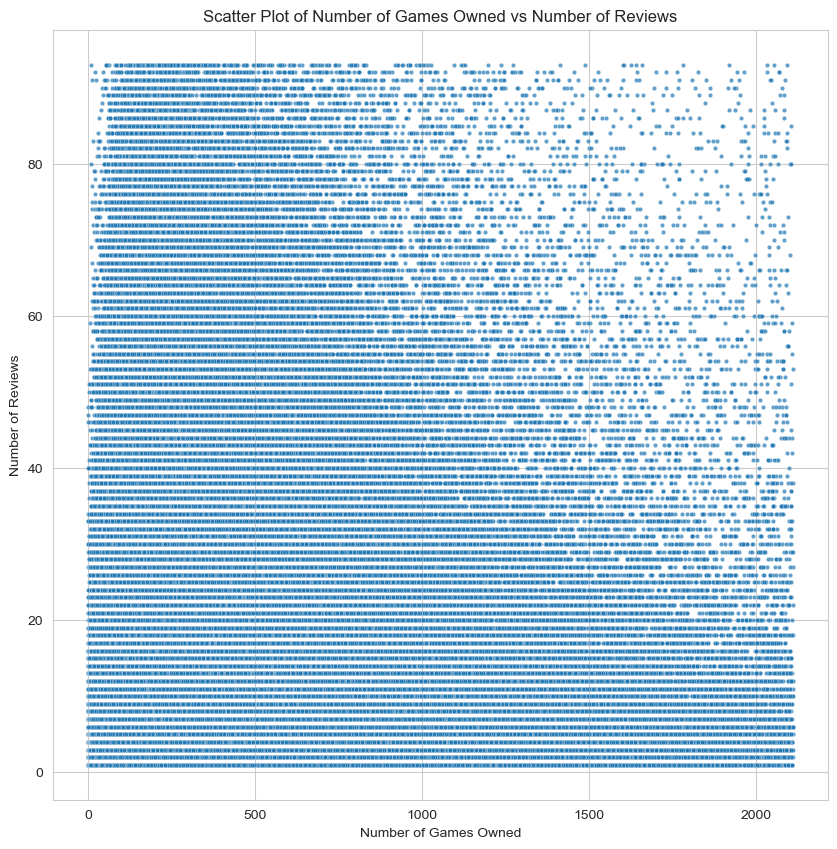

In [110]:
# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(new_df_filtered['author.num_games_owned'], new_df_filtered['author.num_reviews'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"Pearson p-value: {p_value}\n")

# Calculate Spearman's correlation coefficient
spearman_corr, spearman_p_value = spearmanr(new_df_filtered['author.num_games_owned'], new_df_filtered['author.num_reviews'])
print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"Spearman p-value: {spearman_p_value}\n")


# Create a scatter plot to visually see how the data points are distributed
plt.figure(figsize=(10, 10))
sns.scatterplot(data= new_df_filtered, x="author.num_games_owned", y="author.num_reviews",s=10 ,alpha=0.7)

# Add title and labels
plt.title('Scatter Plot of Number of Games Owned vs Number of Reviews')
plt.xlabel('Number of Games Owned')
plt.ylabel('Number of Reviews')
 

# Show the plot
plt.show()


Since there are so many instances in this dataset, this scatterplot is actually very hard to read. Judging by the thinning in the cloud of points in the upper right quadrant we could think that people with higher number of games owned leave generally less reviews by comparison to users with less games owned. This however is false, when we take a look at these two correlation coefficients calculated above, both are positive and relatively low, suggesting the presence of some kind of weak positive correlation between the two variables in exam. The problem resides in the fact that most of the users in this dataset have a low number of games in they collections, this makes this plot misleading.

Let's add to this scatter plot the two medians and count how many data points are above the median for number of reviews, then we will see how many of this data points come from users with above median number of games owned and how many from below.

Median of Number of Games Owned: 38.0
Median of Number of Reviews: 2.0

Number of instances above both medians: 3601775

Number of instances above both median for n. review and under for n. games owned: 1435115



/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


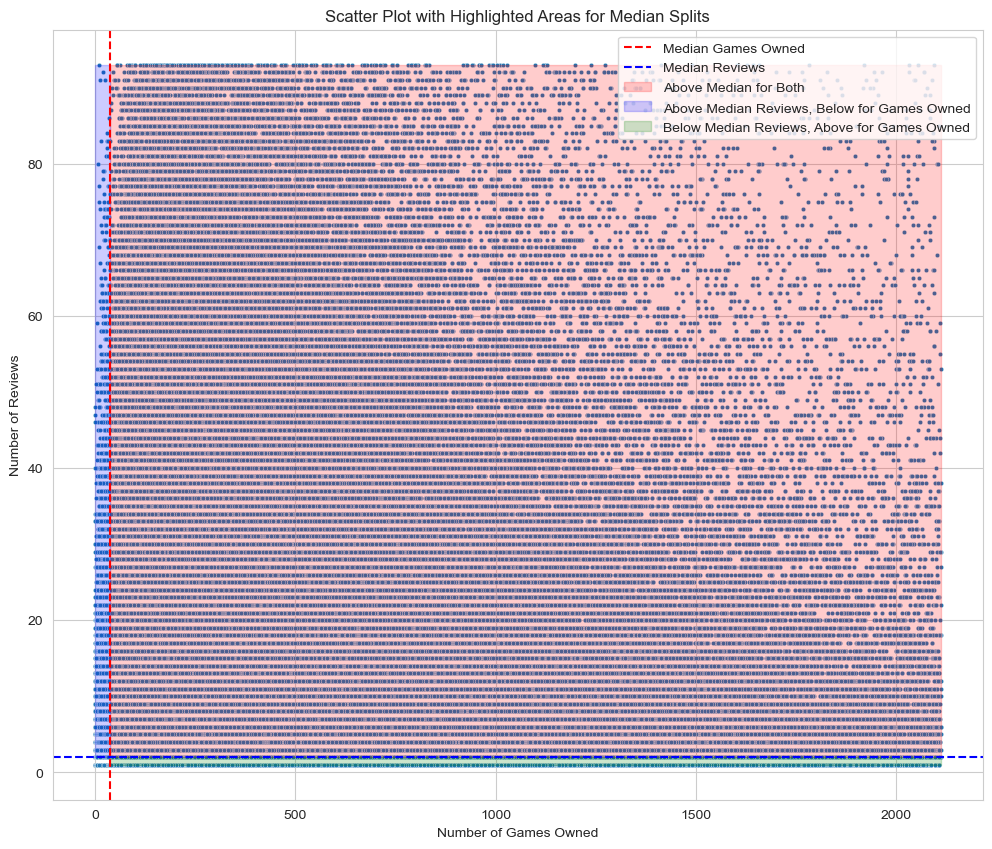

In [111]:
# Calculate the median for number of games owned
median_games_owned = new_df_filtered['author.num_games_owned'].median()
print(f"Median of Number of Games Owned: {median_games_owned}")

# Calculate the median for number of reviews
median_reviews = new_df_filtered['author.num_reviews'].median()
print(f"Median of Number of Reviews: {median_reviews}\n")


# Count values above the median for number of reviews and above the median for number of games owned
count_above = new_df_filtered.loc[(new_df_filtered['author.num_reviews'] > median_reviews) 
                                                                     & (new_df_filtered['author.num_games_owned'] > median_games_owned)].count()
print(f"Number of instances above both medians: {count_above.iloc[0]}\n")
# Count values above the median for number of reviews and under the median for number of games owned (median included)
count_under = new_df_filtered.loc[(new_df_filtered['author.num_reviews'] > median_reviews) 
                                                                     & (new_df_filtered['author.num_games_owned'] <= median_games_owned)].count()
print(f"Number of instances above both median for n. review and under for n. games owned: {count_under.iloc[0]}\n")

# Scatter plot with areas highlighted
plt.figure(figsize=(12, 10))

# Scatter plot of the data points
sns.scatterplot(data=new_df_filtered, x='author.num_games_owned', y='author.num_reviews',s=10)

# Add vertical and horizontal lines at the median values
plt.axvline(median_games_owned, color='red', linestyle='--', label='Median Games Owned')
plt.axhline(median_reviews, color='blue', linestyle='--', label='Median Reviews')

# Highlight the area where both variables are greater than the median
plt.fill_betweenx(y=[median_reviews, new_df_filtered['author.num_reviews'].max()],
                  x1=median_games_owned, x2=new_df_filtered['author.num_games_owned'].max(),
                  color='red', alpha=0.2, label='Above Median for Both')

# Highlight the area where the number of reviews is above the median, but games owned is below or equal to the median
plt.fill_betweenx(y=[median_reviews, new_df_filtered['author.num_reviews'].max()],
                  x1=new_df_filtered['author.num_games_owned'].min(), x2=median_games_owned,
                  color='blue', alpha=0.2, label='Above Median Reviews, Below for Games Owned')

# Highlight the area where the number of reviews is below or equal to the median, but games owned is above the median
plt.fill_betweenx(y=[new_df_filtered['author.num_reviews'].min(), median_reviews],
                  x1=median_games_owned, x2=new_df_filtered['author.num_games_owned'].max(),
                  color='green', alpha=0.2, label='Below Median Reviews, Above for Games Owned')

# Add title and labels
plt.title('Scatter Plot with Highlighted Areas for Median Splits')
plt.xlabel('Number of Games Owned')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()



This plot is perfect for pinpointing what was misleading about the other graph, as we can see the range of variation in the values is huge compared to the actual median which tells us that for example 50% of the total users have a number of reviews <= 2.

Even looking at larger values like the 0.75 quantiles, we can see that most users have very few reviews and games. Here below we are comparing two largely different groups for size, we are actually counting how many of the 25% of the total users with higher number of games owned are above the 75% quantile for number of reviews, and comparing it with 75% rest of the total Steam users.

In [112]:
# Calculate the 75% quantile for number of games owned
quantile_games_owned = new_df_filtered['author.num_games_owned'].quantile(0.75)
print(f"0.75e quantile of Number of Games Owned: {quantile_games_owned}")

# Calculate the 90% quantile for number of reviews
quantile_reviews = new_df_filtered['author.num_reviews'].quantile(0.9)
print(f"0.9 quantile of Number of Reviews: {quantile_reviews}\n")

# Let's check the total size of this two groups identified by the Number of Games Owned quantile.
Total_above75 = new_df_filtered.loc[new_df_filtered['author.num_games_owned'] > quantile_games_owned].count()
Total_under75 = new_df_filtered.loc[new_df_filtered['author.num_games_owned'] <= quantile_games_owned].count()
print(f"Size of the two groups:\nGroup #1: {Total_above75.iloc[0]}\nGroup #2: {Total_under75.iloc[0]}\n")

# Count number of users above both 75% quantiles
count_above = new_df_filtered.loc[(new_df_filtered['author.num_reviews'] > quantile_reviews) 
                                                                     & (new_df_filtered['author.num_games_owned'] > quantile_games_owned)].count()
print(f"Number of users above both quantiles: {count_above.iloc[0]}")

ratio_above = count_above / Total_above75
print(f"Ratio for the first group (> 75% q): {ratio_above.iloc[0]:.2%}\n")

# Count values above the median for number of reviews and under the median for number of games owned (median included)
count_under = new_df_filtered.loc[(new_df_filtered['author.num_reviews'] > quantile_reviews) 
                                                                     & (new_df_filtered['author.num_games_owned'] <= quantile_games_owned)].count()
print(f"Number of instances above 75% quantile for n. review and under for n. games owned: {count_under.iloc[0]}")

ratio_under = count_under / Total_under75

print(f"Ratio for the second group (<= 75% q): {ratio_under.iloc[0]:.2%}")



0.75e quantile of Number of Games Owned: 96.0
0.9 quantile of Number of Reviews: 8.0

Size of the two groups:
Group #1: 3065758
Group #2: 9317339

Number of users above both quantiles: 715939
Ratio for the first group (> 75% q): 23.35%

Number of instances above 75% quantile for n. review and under for n. games owned: 405400
Ratio for the second group (<= 75% q): 4.35%


We see now that even if the count is relatively similar the actual ratio is much higher for the first group, indicating that users with relatively higher number of games in their Steam's library also tend to have the greater number of reviews on the site.